# Clustering and PCA Assignment 

In [68]:
# importing require libararies...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


In [69]:
# Importing dataset

country = pd.read_csv("C:/Users/chandrasen.wadikar/Desktop/Country-data.csv")
country.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [70]:
# Checking basic parameters

country.shape

(167, 10)

In [71]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


### Checking for Outliers

In [72]:
# Checking for outliers in the continuous variables
num_country= country[['child_mort','exports','imports','income','inflation','life_expec','total_fer','gdpp']]

In [73]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
num_country.describe(percentiles=[.25,.5,.75,.90,.95,.99])

child_mort     exports     imports         income   inflation  \
count  167.000000  167.000000  167.000000     167.000000  167.000000   
mean    38.270060   41.108976   46.890215   17144.688623    7.781832   
std     40.328931   27.412010   24.209589   19278.067698   10.570704   
min      2.600000    0.109000    0.065900     609.000000   -4.210000   
25%      8.250000   23.800000   30.200000    3355.000000    1.810000   
50%     19.300000   35.000000   43.300000    9960.000000    5.390000   
75%     62.100000   51.350000   58.750000   22800.000000   10.750000   
90%    100.220000   70.800000   75.420000   41220.000000   16.640000   
95%    116.000000   80.570000   81.140000   48290.000000   20.870000   
99%    153.400000  160.480000  146.080000   84374.000000   41.478000   
max    208.000000  200.000000  174.000000  125000.000000  104.000000   

       life_expec   total_fer           gdpp  
count  167.000000  167.000000     167.000000  
mean    70.555689    2.947964   12964.155689  
std      8.893172    1.513848   18328.704809  
min     32.100000    1.150000     231.000000  
25%     65.300000    1.795000    1330.000000  
50%     73.100000    2.410000    4660.000000  
75%     76.800000    3.880000   14050.000000  
90%     80.400000    5.322000   41840.000000  
95%     81.400000    5.861000   48610.000000  
99%     82.370000    6.563600   79088.000000  
max     82.800000    7.490000  105000.000000

In [74]:
country.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [75]:
country.isnull()

country  child_mort  exports  health  imports  income  inflation  \
0      False       False    False   False    False   False      False   
1      False       False    False   False    False   False      False   
2      False       False    False   False    False   False      False   
3      False       False    False   False    False   False      False   
4      False       False    False   False    False   False      False   
5      False       False    False   False    False   False      False   
6      False       False    False   False    False   False      False   
7      False       False    False   False    False   False      False   
8      False       False    False   False    False   False      False   
9      False       False    False   False    False   False      False   
10     False       False    False   False    False   False      False   
11     False       False    False   False    False   False      False   
12     False       False    False   False    False   False      False   
13     False       False    False   False    False   False      False   
14     False       False    False   False    False   False      False   
15     False       False    False   False    False   False      False   
16     False       False    False   False    False   False      False   
17     False       False    False   False    False   False      False   
18     False       False    False   False    False   False      False   
19     False       False    False   False    False   False      False   
20     False       False    False   False    False   False      False   
21     False       False    False   False    False   False      False   
22     False       False    False   False    False   False      False   
23     False       False    False   False    False   False      False   
24     False       False    False   False    False   False      False   
25     False       False    False   False    False   False      False   
26     False       False    False   False    False   False      False   
27     False       False    False   False    False   False      False   
28     False       False    False   False    False   False      False   
29     False       False    False   False    False   False      False   
..       ...         ...      ...     ...      ...     ...        ...   
137    False       False    False   False    False   False      False   
138    False       False    False   False    False   False      False   
139    False       False    False   False    False   False      False   
140    False       False    False   False    False   False      False   
141    False       False    False   False    False   False      False   
142    False       False    False   False    False   False      False   
143    False       False    False   False    False   False      False   
144    False       False    False   False    False   False      False   
145    False       False    False   False    False   False      False   
146    False       False    False   False    False   False      False   
147    False       False    False   False    False   False      False   
148    False       False    False   False    False   False      False   
149    False       False    False   False    False   False      False   
150    False       False    False   False    False   False      False   
151    False       False    False   False    False   False      False   
152    False       False    False   False    False   False      False   
153    False       False    False   False    False   False      False   
154    False       False    False   False    False   False      False   
155    False       False    False   False    False   False      False   
156    False       False    False   False    False   False      False   
157    False       False    False   False    False   False      False   
158    False       False    False   False    False   False      False   
159    False       False    False   False    False   False     

In [76]:
country.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

###  Feature Standardisation

In [77]:
# Normalising continuous features
df = country[['child_mort','income','gdpp','exports','health','imports','inflation','life_expec','total_fer']]

In [78]:
normalized_df=(df-df.mean())/df.std()
country.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

### Splitting Data into Training and Test Sets

In [85]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = country.drop(['life_expec','country'],axis=1)

# Putting response variable to y
y = country['gdpp']

y.head()

0      553
1     4090
2     4460
3     3530
4    12200
Name: gdpp, dtype: int64

In [86]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

### Correlation Matrix

In [87]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

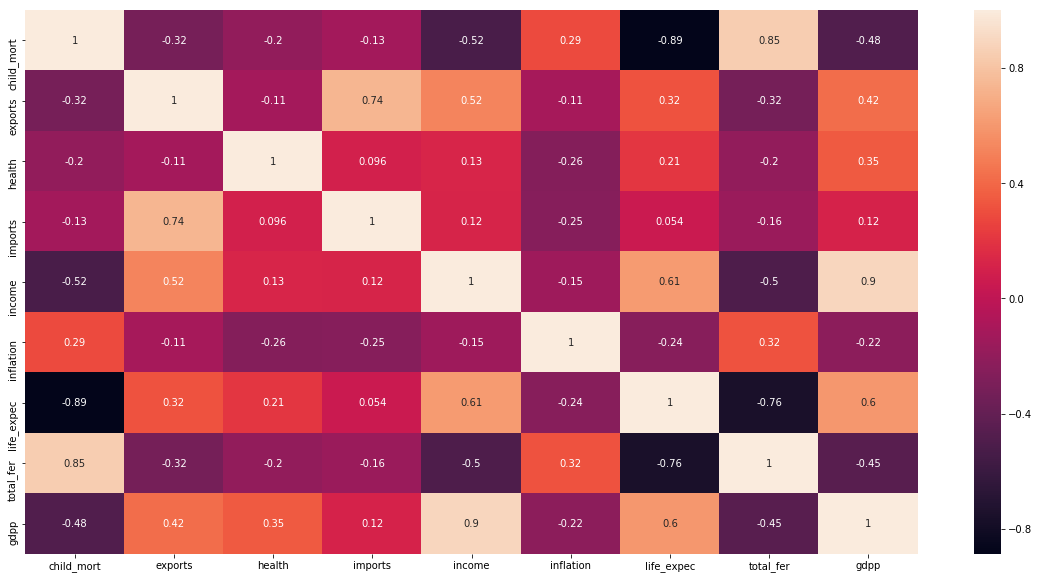

In [88]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(country.corr(),annot = True)

### Appliying Principal Component Analysis

In [89]:
X_train.shape

(116, 8)

In [91]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=50)

In [92]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=50,
  svd_solver='randomized', tol=0.0, whiten=False)

In [93]:
pca.components_

array([[-9.08766127e-04,  5.78319662e-04,  2.98937958e-05,
         1.49171757e-04,  7.18151226e-01, -9.09915405e-05,
        -3.22519027e-05,  6.95886215e-01],
       [-8.86267796e-04,  7.90648054e-04, -2.18258060e-04,
        -4.08543076e-04,  6.95885171e-01,  4.19605304e-04,
        -3.81121459e-05, -7.18151813e-01],
       [ 9.93434195e-01,  2.92008369e-02, -7.36703844e-03,
         1.03935011e-02,  1.21099218e-03,  1.06355201e-01,
         2.75792639e-02,  3.66053113e-05],
       [-2.07572400e-02,  6.82980850e-01, -1.49190656e-03,
         7.27326710e-01, -5.42789133e-04, -6.39411290e-02,
        -3.33533404e-03, -1.98908563e-04],
       [-9.09782418e-02,  5.10859088e-01, -6.32425439e-02,
        -4.17034905e-01, -8.58902591e-04,  7.43462903e-01,
         9.49264374e-03,  5.32787576e-04],
       [-6.04338024e-02, -5.17309544e-01,  5.83626140e-02,
         5.41932440e-01,  3.77597811e-04,  6.56989983e-01,
         2.37516656e-03, -7.13490257e-05],
       [ 6.36492992e-03,  6.400368

In [201]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'Feature':colnames})
pcs_df.head()

PC1       PC2     Feature
0 -0.000909 -0.000886  child_mort
1  0.000578  0.000791     exports
2  0.000030 -0.000218      health
3  0.000149 -0.000409     imports
4  0.718151  0.695885      income

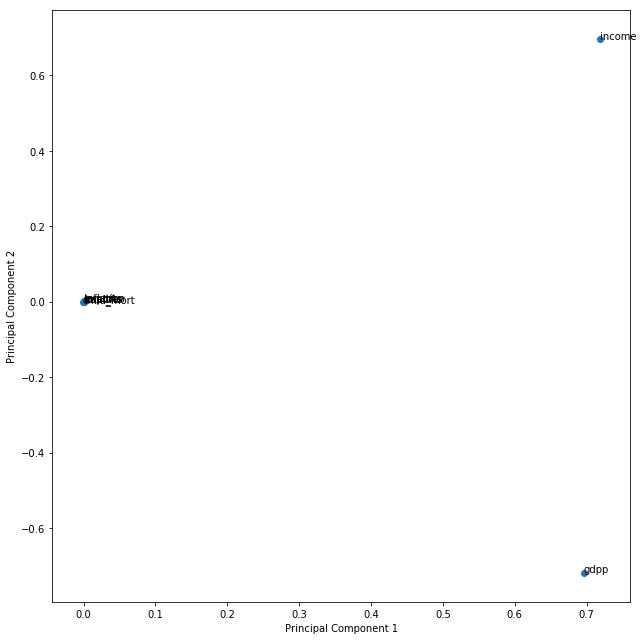

In [95]:
%matplotlib inline
fig = plt.figure(figsize = (9,9))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

#### Looking at the screeplot to assess the number of needed principal components

In [111]:
pca.explained_variance_ratio_

array([9.49815057e-01, 5.01808950e-02, 2.11804517e-06, 1.50095567e-06,
       2.77670171e-07, 1.43427200e-07, 7.13456071e-09, 1.18127284e-09])

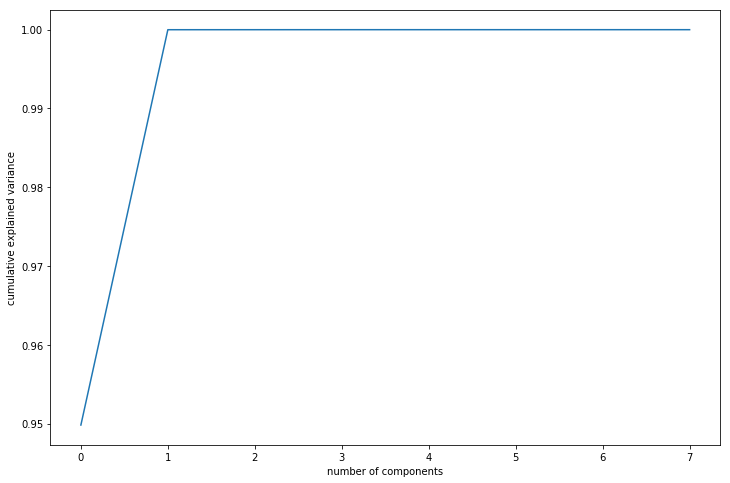

In [112]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

Looks like 4 components are enough to describe 95% of the variance in the dataset
We'll choose 4 components for our modeling


In [123]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=5)

#### Basis transformation - getting the data onto our PCs

In [124]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(116, 5)

#### Creating correlation matrix for the principal components - we expect little to no correlation

In [125]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

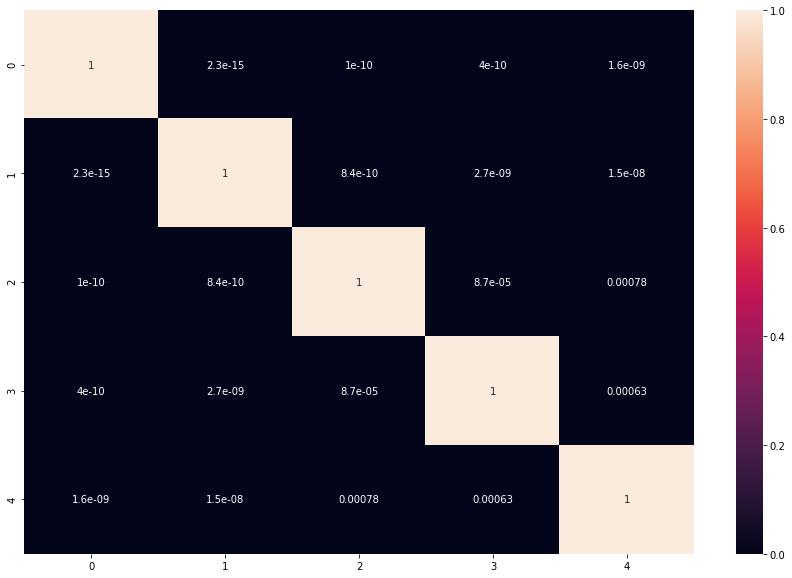

In [126]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (15,10))
sns.heatmap(corrmat,annot = True)

In [127]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.0007794313163551528 , min corr:  0.0


In [128]:
#Applying selected components to the test data - 16 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(51, 5)

## Applying a K-Means on  Principal Components

In [130]:
from sklearn import metrics

- R (Recency): Number of days since last purchase
- F (Frequency): Number of transactions 
- M (Monetary): Total amount of transactions(revenue contributed)

In [154]:
#  Monetary 
grouped_df=country.groupby('income')['gdpp'].sum()
grouped_df =grouped_df.reset_index()
grouped_df.head()

income  gdpp
0     609   334
1     700   327
2     764   231
3     814   348
4     888   446

In [156]:
# Frequency
frequency =country.groupby('income')['inflation'].count()
frequency = frequency.reset_index()
frequency.columns = ['income','frequency']
frequency.head()

income  frequency
0     609          1
1     700          1
2     764          1
3     814          1
4     888          1

In [157]:
# merge the two data frames

grouped_df = pd.merge(grouped_df, frequency , on='income', how='inner')
grouped_df.head()

income  gdpp  frequency
0     609   334          1
1     700   327          1
2     764   231          1
3     814   348          1
4     888   446          1

In [159]:
country.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [161]:
health =country.groupby('income')['health'].min()
health = health.reset_index()
health.head()

income  health
0     609    7.91
1     700   11.80
2     764   11.60
3     814    5.16
4     888    3.98

In [162]:
# Merge the data frame
grouped_df = pd.merge(grouped_df, health , on='income', how='inner')
#grouped_df.columns 
grouped_df.columns = ['income', 'gdpp', 'frequency','recency']
grouped_df.head()

income  gdpp  frequency  recency
0     609   334          1     7.91
1     700   327          1    11.80
2     764   231          1    11.60
3     814   348          1     5.16
4     888   446          1     3.98

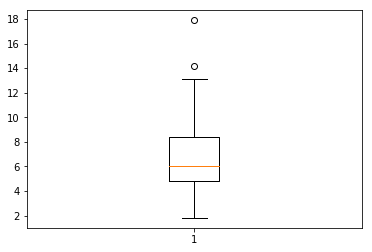

In [163]:
# Outlier treatment

plt.boxplot(grouped_df['recency'])
plt.show()

#### Removing Outliers

In [164]:
# removing outliers (statistical method)
Q1 = grouped_df.gdpp.quantile(0.05)
Q3 = grouped_df.gdpp.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.gdpp >= Q1 - 1.5*IQR) & (grouped_df.gdpp <= Q3 + 1.5*IQR)]

# outlier treatment for recency
Q1 = grouped_df.recency.quantile(0.05)
Q3 = grouped_df.recency.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.recency >= Q1 - 1.5*IQR) & (grouped_df.recency <= Q3 + 1.5*IQR)]

# outlier treatment for frequency
Q1 = grouped_df.frequency.quantile(0.05)
Q3 = grouped_df.frequency.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.frequency >= Q1 - 1.5*IQR) & (grouped_df.frequency <= Q3 + 1.5*IQR)]



In [165]:
# Rescaling
country= grouped_df[['gdpp','frequency','recency']]
country.head()

gdpp  frequency  recency
0   334          1     7.91
1   327          1    11.80
2   231          1    11.60
3   348          1     5.16
4   446          1     3.98

In [167]:
# Instantiate 

scaler = StandardScaler()

# fit_transform

country_scaled = scaler.fit_transform(country)
country_scaled.shape

(156, 3)

In [168]:
# Hopkins Statistics

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [173]:
#First convert the numpy array that you have to a dataframe
country_scaled = pd.DataFrame(country_scaled)
country_scaled.columns = ['gdpp', 'frequency', 'recency']

In [174]:
#Use the Hopkins Statistic function by passing the above dataframe as a paramter
hopkins(country_scaled)

0.9283237302170488

In [175]:
# Converting numpy array into data frame

country_scaled = pd.DataFrame(country_scaled)
country_scaled.columns = ['gdpp','frequency','recency']
country_scaled.head()

gdpp  frequency   recency
0 -0.678753  -0.275431  0.446502
1 -0.679103  -0.275431  1.854572
2 -0.683914  -0.275431  1.782178
3 -0.678051  -0.275431 -0.548921
4 -0.673140  -0.275431 -0.976048

## Modeling 

In [177]:
# K-means with some arbitary k

kmeans = KMeans (n_clusters=4, max_iter=50)
kmeans.fit(country_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [178]:
kmeans.labels_

array([3, 3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 2, 0, 0, 0, 0, 3, 3, 0, 3, 3, 0,
       3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0,
       0, 3, 2, 0, 3, 3, 0, 3, 0, 3, 2, 2, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       3, 0, 3, 2, 0, 2, 3, 3, 0, 3, 0, 3, 3, 2, 2, 2, 0, 1, 3, 0, 0, 1,
       2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1])

### Finding the optimal Number of Clusters

### SSD (Sum Squared Distance)

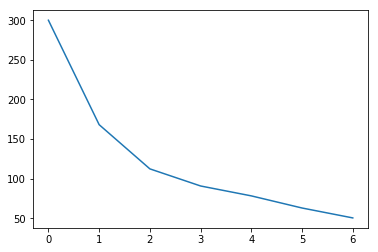

In [179]:
# elbow-curve/SSD (Sum of Squared Distance)
ssd= [ ]
range_n_clusters = [2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters,max_iter=50)
    kmeans.fit(country_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters

plt.plot(ssd)
plt.show()

### Silhouette Analysis

In [180]:
range_n_clusters = [2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters,max_iter=50)
    kmeans.fit(country_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouetter_avg = silhouette_score(country_scaled,cluster_labels)
    print("For n_clusters={0}, the silhouetter score is {1}".format(num_clusters,silhouetter_avg))
    

For n_clusters=2, the silhouetter score is 0.6481424829363532
For n_clusters=3, the silhouetter score is 0.5621532929191903
For n_clusters=4, the silhouetter score is 0.4964212606060121
For n_clusters=5, the silhouetter score is 0.5188254984722368
For n_clusters=6, the silhouetter score is 0.4643270009850289
For n_clusters=7, the silhouetter score is 0.4733911624210022
For n_clusters=8, the silhouetter score is 0.4313349499150398


In [181]:
kmeans = KMeans (n_clusters=3, max_iter=50)
kmeans.fit(country_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [182]:
kmeans.labels_

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 0, 1, 1, 1, 1, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 2, 2, 2, 1, 0, 0, 1, 1, 0,
       2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1])

In [183]:
# assign the label

grouped_df['cluster_id'] = kmeans.labels_
grouped_df.head()

income  gdpp  frequency  recency  cluster_id
0     609   334          1     7.91           1
1     700   327          1    11.80           0
2     764   231          1    11.60           0
3     814   348          1     5.16           1
4     888   446          1     3.98           1

C:\PY\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


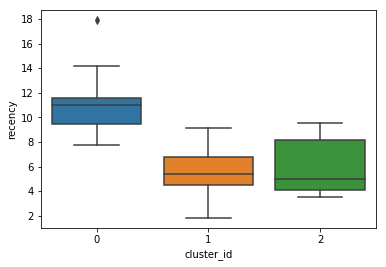

In [184]:
# plot
sns.boxplot(x='cluster_id', y='recency',data=grouped_df)
plt.show()

C:\PY\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


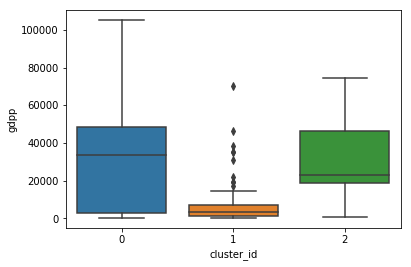

In [185]:
sns.boxplot(x='cluster_id', y='gdpp',data=grouped_df)
plt.show()

C:\PY\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


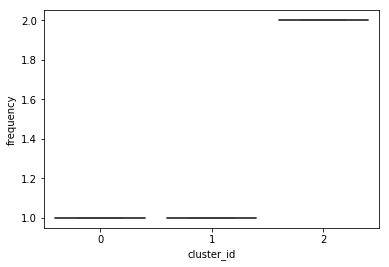

In [186]:
sns.boxplot(x='cluster_id', y='frequency',data=grouped_df)
plt.show()

## Hierarchical Clustering 

In [188]:
country_scaled.head()

gdpp  frequency   recency
0 -0.678753  -0.275431  0.446502
1 -0.679103  -0.275431  1.854572
2 -0.683914  -0.275431  1.782178
3 -0.678051  -0.275431 -0.548921
4 -0.673140  -0.275431 -0.976048

In [189]:
grouped_df.head()

income  gdpp  frequency  recency  cluster_id
0     609   334          1     7.91           1
1     700   327          1    11.80           0
2     764   231          1    11.60           0
3     814   348          1     5.16           1
4     888   446          1     3.98           1

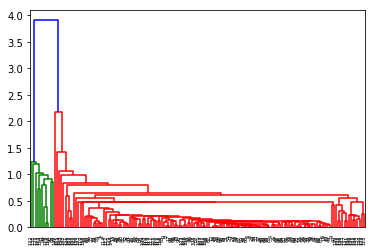

In [190]:
# Single Linkage

mergings = linkage(country_scaled,method="single",metric='euclidean')
dendrogram(mergings)
plt.show()

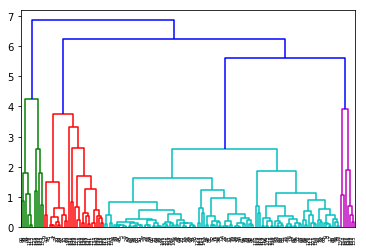

In [191]:
# Complete Linkage
mergings = linkage(country_scaled,method="complete",metric='euclidean')
dendrogram(mergings)
plt.show()

In [195]:
# 3 clusters
cluster_lables = cut_tree(mergings,n_clusters=3).reshape(-1,)
cluster_lables

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 0, 1, 1, 0, 0, 1,
       2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0])

In [196]:
# assign cluster lables

grouped_df['cluster_lables'] = cluster_lables
grouped_df.head()

income  gdpp  frequency  recency  cluster_id  cluster_lables
0     609   334          1     7.91           1               0
1     700   327          1    11.80           0               1
2     764   231          1    11.60           0               1
3     814   348          1     5.16           1               0
4     888   446          1     3.98           1               0

C:\PY\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


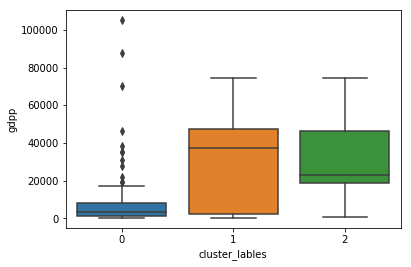

In [197]:
# plots
sns.boxplot(x='cluster_lables', y='gdpp', data=grouped_df)
plt.show()

C:\PY\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


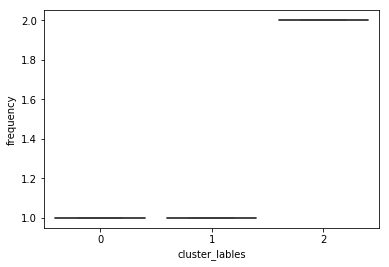

In [198]:
sns.boxplot(x='cluster_lables', y='frequency', data=grouped_df)
plt.show()

C:\PY\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


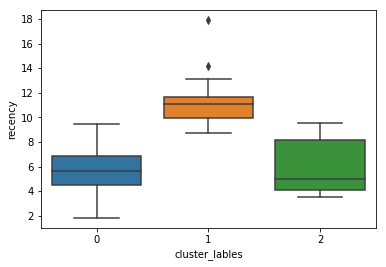

In [199]:
sns.boxplot(x='cluster_lables', y='recency', data=grouped_df)
plt.show()